## Sentiment Analysis
Sentiment analysis is the interpretation and classification of emotions (positive, negative, and neutral) within text data using text analysis techniques.

In [1]:
#importing all the requirements
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Twitter API credentials
consumer_key = 'xxxxx'
consumer_secret = 'xxxxx'
access_token = 'xxxxx'
access_token_secret = 'xxxxx'

In [3]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumer_key,consumer_secret)
#Set the access token and access token secret
authenticate.set_access_token(access_token, access_token_secret)
#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [4]:
#Extract 100 tweets frim the twitter user
posts = api.user_timeline(screen_name ="svdvf_", count= 100, lang = "en", tweet_mode="extended")

#print the last 5 tweets from the accountg
print ("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i  = i + 1

Unexpected parameter: lang


Show the 5 recent tweets: 

1) RT @IavenderfieIds: — owner of a small bookshop https://t.co/fFXwqThQAf

2) RT @baym: Person 1: The glass is half empty

Person 2: The glass is half full

Bioinformatician: the reads match to the carp genome, maybe…

3) #66daysofdata 
D12
📋 More on Gradient descent algorithm (derivation and GD for linear regression).
📋Performed EDA on Wine quality dataset from UCI.

4) #66daysofdata 
D11
📋 Gradient descent to estimate the parameters for the hypothesis function to measure how well it fits into the data. 
📋Practiced linear regression in python.

5) #66daysofdata 
D10
📋 Digged a bit more in the cost function visualization using plots for different parameter values. 📈



In [5]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,RT @IavenderfieIds: — owner of a small booksho...
1,RT @baym: Person 1: The glass is half empty\n\...
2,#66daysofdata \nD12\n📋 More on Gradient descen...
3,#66daysofdata \nD11\n📋 Gradient descent to est...
4,#66daysofdata \nD10\n📋 Digged a bit more in th...


In [6]:
#Clean the text

#create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removed @mentions
    text = re.sub(r'#', '', text) #Removing the '#'
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #remove the hyperlink
    
    return text

#cleaning the text
df['Tweets']= df['Tweets'].apply(cleanTxt)

#show the cleaned text
df

    
    

,Tweets
0,: — owner of a small bookshop
1,: Person 1: The glass is half empty\n\nPerson ...
2,66daysofdata \nD12\n📋 More on Gradient descent...
3,66daysofdata \nD11\n📋 Gradient descent to esti...
4,66daysofdata \nD10\n📋 Digged a bit more in the...
...,...
90,: is my code fast? no. but is it well document...
91,: Here’s a breakdown of what we know so far ab...
92,: Giving books to children is not just about k...
93,: My heart ❤️ 🥺🥺


In [7]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#new dataframe with new columns
df

,Tweets,Subjectivity,Polarity
0,: — owner of a small bookshop,0.400000,-0.250000
1,: Person 1: The glass is half empty\n\nPerson ...,0.345833,-0.020833
2,66daysofdata \nD12\n📋 More on Gradient descent...,0.500000,0.500000
3,66daysofdata \nD11\n📋 Gradient descent to esti...,0.000000,0.000000
4,66daysofdata \nD10\n📋 Digged a bit more in the...,0.550000,0.250000
...,...,...,...
90,: is my code fast? no. but is it well document...,0.600000,0.200000
91,: Here’s a breakdown of what we know so far ab...,1.000000,0.100000
92,: Giving books to children is not just about k...,0.000000,0.000000
93,: My heart ❤️ 🥺🥺,0.000000,0.000000


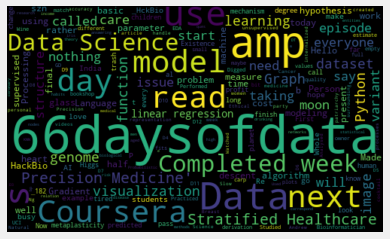

In [8]:
#plotting word cloud using the cloud plot
allWords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [9]:
#create a function to compute the negative, neutral and positive nalysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,: — owner of a small bookshop,0.400000,-0.250000,Negative
1,: Person 1: The glass is half empty\n\nPerson ...,0.345833,-0.020833,Negative
2,66daysofdata \nD12\n📋 More on Gradient descent...,0.500000,0.500000,Positive
3,66daysofdata \nD11\n📋 Gradient descent to esti...,0.000000,0.000000,Neutral
4,66daysofdata \nD10\n📋 Digged a bit more in the...,0.550000,0.250000,Positive
...,...,...,...,...
90,: is my code fast? no. but is it well document...,0.600000,0.200000,Positive
91,: Here’s a breakdown of what we know so far ab...,1.000000,0.100000,Positive
92,: Giving books to children is not just about k...,0.000000,0.000000,Neutral
93,: My heart ❤️ 🥺🥺,0.000000,0.000000,Neutral


In [10]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) 66daysofdata 
D12
📋 More on Gradient descent algorithm (derivation and GD for linear regression).
📋Performed EDA on Wine quality dataset from UCI.

2) 66daysofdata 
D10
📋 Digged a bit more in the cost function visualization using plots for different parameter values. 📈

3) 66daysofdata 
D6
📋 Completed week 4 of 'Data Science in Stratified Healthcare and Precision Medicine' on Coursera.
📋 Basics of Natural Language Processing and modeling processes.

4) 66daysofdata D4
📋Probabilistic modeling &amp; statistical methods in medical research for answering ques. like risk of coronary heart disease for men aged over 50 with drinking habits, relation b/w income &amp; high bp.
📋Used supervised machine learning model KNN &amp; DT on iris dataset.

5) : Am I... a fruit fly? 

Next time anyone says Drosophila aren't good models for humans, this is what I'll link:



6) _: Hello Everyone!

Our team ScGenomics is proud to present our work for the final stage of the HackBio 2021 Internship program

In [11]:
#Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity']) 
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) : — owner of a small bookshop 

2) : Person 1: The glass is half empty

Person 2: The glass is half full

Bioinformatician: the reads match to the carp genome, maybe…

3) 66daysofdata 
D5
📋Analysed Breast Cancer dataset in Python.
Slow day today😴

4) _ring: That is very ridiculous how everyone is ware about Sci-Hub violating 'privacy' while nobody cares, for example, about havin…

5) _salsa: A baby in San Diego was admitted to neonatal intensive care with unexplained symptoms. 

His genome was sequenced: Within 43…

6) : Gotta reward myself after a long day of doing nothing 

7) : "Neuroplasticity is itself subject to change, this is called metaplasticity." 

How plastic is metaplasticity, if at a…

8) : for reasons unknown i will simply be fading away into the sea like foam, the saltwater of my tears mingling with that of the…

9) Man, wasted whole night working, just to send the assigned file on wrong email id before the deadline. And didn't double check because phone turned off d

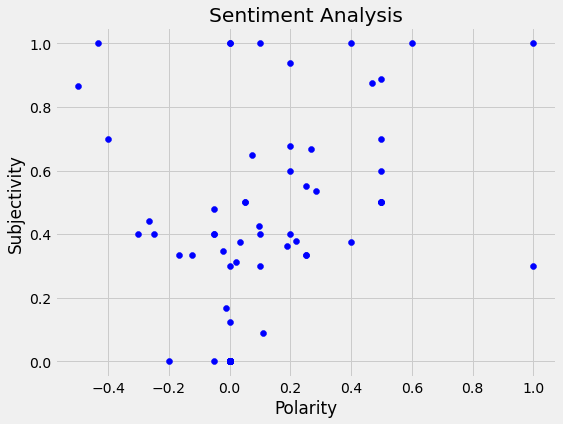

In [12]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Majority of my tweets are in neutral zone here.

In [13]:
#get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round( (ptweets.shape[0] / df.shape[0] *100),1)

35.8

In [14]:
#get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round( (ntweets.shape[0] / df.shape[0] *100), 1)

15.8

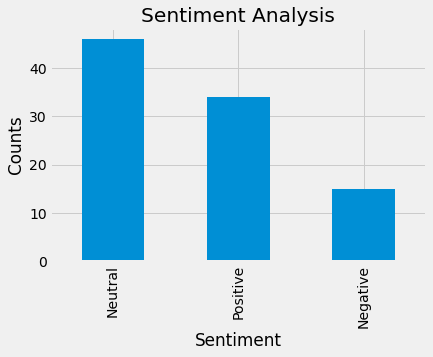

In [15]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()